# `k` Near Neighbors with different metrics

## Upload data
https://www.kaggle.com/datasets/mahmoudelhemaly/students-grading-dataset?resource=download

In [4]:

#!pip install polars

import polars as pl

# Replace 'your_file.csv' with the actual path to your CSV file
df = pl.read_csv('datos/Students_Grading_Dataset.csv')

# Now you can work with the DataFrame 'df'
print(df.head())


shape: (5, 23)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Student_I ┆ First_Nam ┆ Last_Name ┆ Email     ┆ … ┆ Parent_Ed ┆ Family_In ┆ Stress_Le ┆ Sleep_Ho │
│ D         ┆ e         ┆ ---       ┆ ---       ┆   ┆ ucation_L ┆ come_Leve ┆ vel       ┆ urs_per_ │
│ ---       ┆ ---       ┆ str       ┆ str       ┆   ┆ evel      ┆ l         ┆ (1-10)    ┆ Night    │
│ str       ┆ str       ┆           ┆           ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ str       ┆ str       ┆ i64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ S1000     ┆ Omar      ┆ Williams  ┆ student0@ ┆ … ┆ Master's  ┆ Medium    ┆ 1         ┆ 5.9      │
│           ┆           ┆           ┆ universit ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆           ┆ y.com     ┆   ┆           ┆           

In [5]:
# prompt: Print columns name and type

df.schema


Schema([('Student_ID', String),
        ('First_Name', String),
        ('Last_Name', String),
        ('Email', String),
        ('Gender', String),
        ('Age', Int64),
        ('Department', String),
        ('Attendance (%)', Float64),
        ('Midterm_Score', Float64),
        ('Final_Score', Float64),
        ('Assignments_Avg', Float64),
        ('Quizzes_Avg', Float64),
        ('Participation_Score', Float64),
        ('Projects_Score', Float64),
        ('Total_Score', Float64),
        ('Grade', String),
        ('Study_Hours_per_Week', Float64),
        ('Extracurricular_Activities', String),
        ('Internet_Access_at_Home', String),
        ('Parent_Education_Level', String),
        ('Family_Income_Level', String),
        ('Stress_Level (1-10)', Int64),
        ('Sleep_Hours_per_Night', Float64)])

## Knowing the data

In [6]:
# prompt: select the columns: Letter grade ,Stress_Level, Internet, Study hours, Familly income level

df2 = df.select(['Grade', 'Stress_Level (1-10)', 'Internet_Access_at_Home', 'Study_Hours_per_Week', 'Family_Income_Level'])
df2


Grade,Stress_Level (1-10),Internet_Access_at_Home,Study_Hours_per_Week,Family_Income_Level
str,i64,str,f64,str
"""C""",1,"""No""",10.3,"""Medium"""
"""F""",4,"""No""",27.1,"""Low"""
"""F""",9,"""No""",12.4,"""Low"""
"""A""",8,"""Yes""",25.5,"""Low"""
"""A""",6,"""No""",13.3,"""Medium"""
…,…,…,…,…
"""A""",10,"""No""",7.8,"""Medium"""
"""C""",4,"""Yes""",24.2,"""Medium"""
"""D""",5,"""Yes""",7.6,"""High"""


In [7]:
df2.schema  # Shows column names and their data types

Schema([('Grade', String),
        ('Stress_Level (1-10)', Int64),
        ('Internet_Access_at_Home', String),
        ('Study_Hours_per_Week', Float64),
        ('Family_Income_Level', String)])

In [8]:
df2.null_count()


Grade,Stress_Level (1-10),Internet_Access_at_Home,Study_Hours_per_Week,Family_Income_Level
u32,u32,u32,u32,u32
0,0,0,0,0


In [9]:
categorical_cols = [col for col, dtype in df2.schema.items() if dtype == pl.Utf8]
categorical_cols

['Grade', 'Internet_Access_at_Home', 'Family_Income_Level']

In [10]:
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df2[col].value_counts())


Value counts for Grade:
shape: (5, 2)
┌───────┬───────┐
│ Grade ┆ count │
│ ---   ┆ ---   │
│ str   ┆ u32   │
╞═══════╪═══════╡
│ A     ┆ 997   │
│ C     ┆ 975   │
│ D     ┆ 1011  │
│ B     ┆ 1014  │
│ F     ┆ 1003  │
└───────┴───────┘

Value counts for Internet_Access_at_Home:
shape: (2, 2)
┌─────────────────────────┬───────┐
│ Internet_Access_at_Home ┆ count │
│ ---                     ┆ ---   │
│ str                     ┆ u32   │
╞═════════════════════════╪═══════╡
│ No                      ┆ 2480  │
│ Yes                     ┆ 2520  │
└─────────────────────────┴───────┘

Value counts for Family_Income_Level:
shape: (3, 2)
┌─────────────────────┬───────┐
│ Family_Income_Level ┆ count │
│ ---                 ┆ ---   │
│ str                 ┆ u32   │
╞═════════════════════╪═══════╡
│ Low                 ┆ 1687  │
│ High                ┆ 1639  │
│ Medium              ┆ 1674  │
└─────────────────────┴───────┘


In [11]:
numeric_cols = [col for col, dtype in df2.schema.items() if dtype in [pl.Int64, pl.Float64]]
numeric_cols

['Stress_Level (1-10)', 'Study_Hours_per_Week']

In [12]:
df2.select(numeric_cols).describe()


statistic,Stress_Level (1-10),Study_Hours_per_Week
str,f64,f64
"""count""",5000.0,5000.0
"""null_count""",0.0,0.0
"""mean""",5.5072,17.52114
"""std""",2.886662,7.193035
"""min""",1.0,5.0
"""25%""",3.0,11.5
"""50%""",6.0,17.4
"""75%""",8.0,23.7
"""max""",10.0,30.0


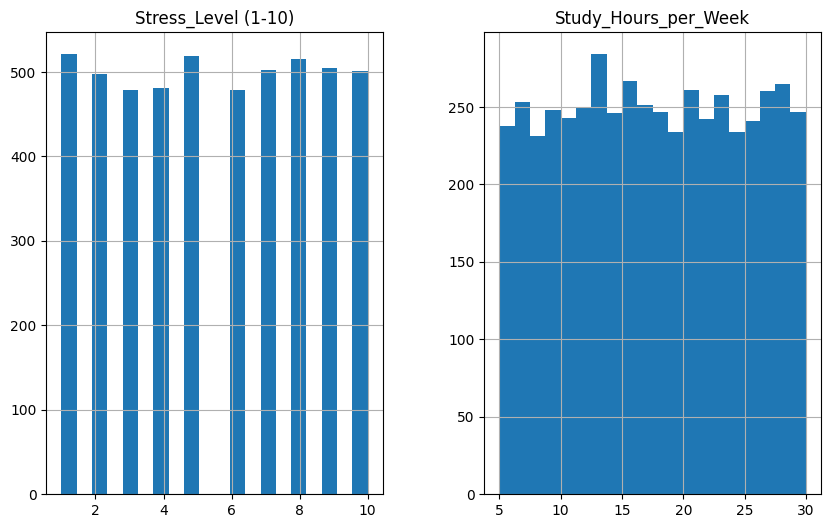

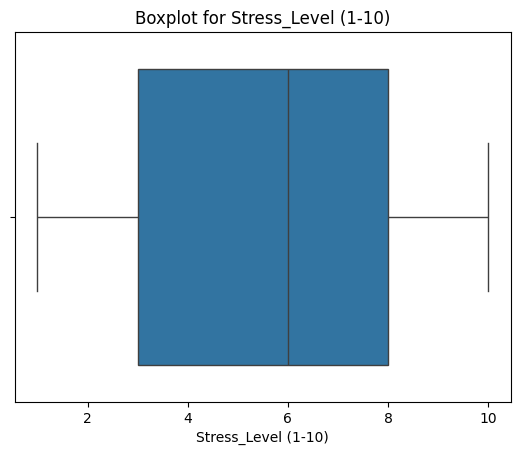

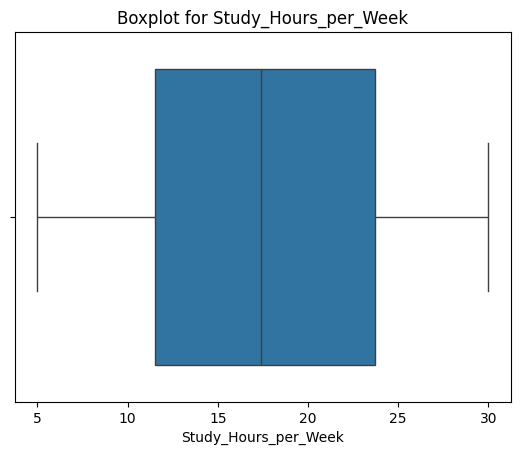

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numeric data
df2.select(numeric_cols).to_pandas().hist(figsize=(10, 6), bins=20)
plt.show()

# Boxplots for numeric columns
for col in numeric_cols:
    sns.boxplot(x=df2[col].to_pandas())
    plt.title(f"Boxplot for {col}")
    plt.show()


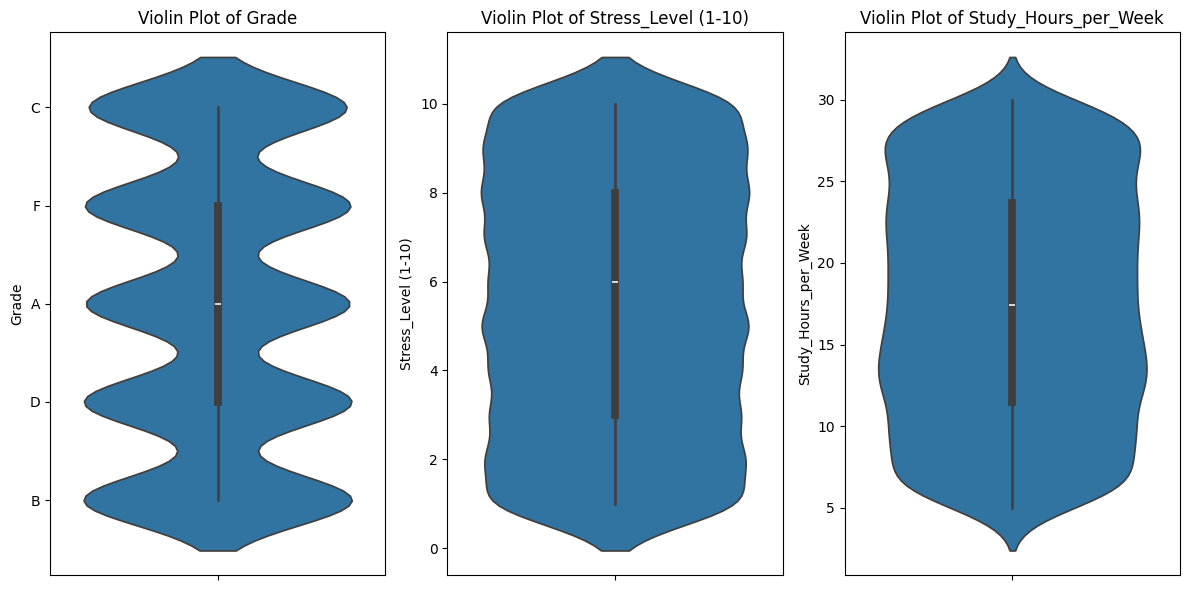

In [14]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Polars DataFrame to Pandas
df_pandas = df2.to_pandas()

# List of numeric columns
numeric_cols = ['Grade', 'Stress_Level (1-10)', 'Study_Hours_per_Week']

# Create Violin Plots for Numeric Columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.violinplot(y=df_pandas[col])
    plt.title(f"Violin Plot of {col}")

plt.tight_layout()
plt.show()


With the columns measured at school ('Grade', 'Stress_Level (1-10)'), the columns of the house ( 'Internet_Access_at_Home', 'Study_Hours_per_Week', 'Family_Income_Level) will be predicted.

## Knowing the data

In [15]:
import polars as pl

# Check the actual column types
print(df2.schema)

# Select only truly numeric columns
numeric_cols = [col for col, dtype in df2.schema.items() if dtype in [pl.Int64, pl.Float64]]

print("Numeric columns:", numeric_cols)  # Verify selection

# Apply Min-Max Scaling only to numeric columns
df2 = df2.with_columns([
    ((df2[col] - df2[col].min()) / (df2[col].max() - df2[col].min())).alias(col + "_normalized")
    for col in numeric_cols
])

print(df2)


Schema({'Grade': String, 'Stress_Level (1-10)': Int64, 'Internet_Access_at_Home': String, 'Study_Hours_per_Week': Float64, 'Family_Income_Level': String})
Numeric columns: ['Stress_Level (1-10)', 'Study_Hours_per_Week']
shape: (5_000, 7)
┌───────┬───────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┐
│ Grade ┆ Stress_Level  ┆ Internet_Acc ┆ Study_Hours_ ┆ Family_Incom ┆ Stress_Level ┆ Study_Hours_ │
│ ---   ┆ (1-10)        ┆ ess_at_Home  ┆ per_Week     ┆ e_Level      ┆ (1-10)_norma ┆ per_Week_nor │
│ str   ┆ ---           ┆ ---          ┆ ---          ┆ ---          ┆ lized        ┆ malize…      │
│       ┆ i64           ┆ str          ┆ f64          ┆ str          ┆ ---          ┆ ---          │
│       ┆               ┆              ┆              ┆              ┆ f64          ┆ f64          │
╞═══════╪═══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ C     ┆ 1             ┆ No           ┆ 10.3         ┆

In [16]:

# Define income levels in order
income_levels = ["Low", "Medium", "High"]

# Create cumulative one-hot encoding
df3 = df2.with_columns([
    (df2["Family_Income_Level"].is_in(income_levels[i:])).cast(pl.Int8).alias(f"Income_{level}")
    for i, level in enumerate(income_levels)
])

# Drop the original categorical column
#df3 = df3.drop("Family_Income_Level")

print(df3.head())
df3.schema

shape: (5, 10)
┌───────┬────────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Grade ┆ Stress_Lev ┆ Internet_A ┆ Study_Hour ┆ … ┆ Study_Hou ┆ Income_Lo ┆ Income_Me ┆ Income_Hi │
│ ---   ┆ el (1-10)  ┆ ccess_at_H ┆ s_per_Week ┆   ┆ rs_per_We ┆ w         ┆ dium      ┆ gh        │
│ str   ┆ ---        ┆ ome        ┆ ---        ┆   ┆ ek_normal ┆ ---       ┆ ---       ┆ ---       │
│       ┆ i64        ┆ ---        ┆ f64        ┆   ┆ ize…      ┆ i8        ┆ i8        ┆ i8        │
│       ┆            ┆ str        ┆            ┆   ┆ ---       ┆           ┆           ┆           │
│       ┆            ┆            ┆            ┆   ┆ f64       ┆           ┆           ┆           │
╞═══════╪════════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ C     ┆ 1          ┆ No         ┆ 10.3       ┆ … ┆ 0.212     ┆ 1         ┆ 1         ┆ 0         │
│ F     ┆ 4          ┆ No         ┆ 27.1       ┆ … ┆ 0.884     ┆ 1         ┆

Schema([('Grade', String),
        ('Stress_Level (1-10)', Int64),
        ('Internet_Access_at_Home', String),
        ('Study_Hours_per_Week', Float64),
        ('Family_Income_Level', String),
        ('Stress_Level (1-10)_normalized', Float64),
        ('Study_Hours_per_Week_normalized', Float64),
        ('Income_Low', Int8),
        ('Income_Medium', Int8),
        ('Income_High', Int8)])

In [17]:
df3.select(["Family_Income_Level",'Income_Low', 'Income_Medium', 'Income_High'])

Family_Income_Level,Income_Low,Income_Medium,Income_High
str,i8,i8,i8
"""Medium""",1,1,0
"""Low""",1,0,0
"""Low""",1,0,0
"""Low""",1,0,0
"""Medium""",1,1,0
…,…,…,…
"""Medium""",1,1,0
"""Medium""",1,1,0
"""High""",1,1,1


In [18]:
df4 = df3.hstack(df3.select("Grade").to_dummies())
df4.schema

Schema([('Grade', String),
        ('Stress_Level (1-10)', Int64),
        ('Internet_Access_at_Home', String),
        ('Study_Hours_per_Week', Float64),
        ('Family_Income_Level', String),
        ('Stress_Level (1-10)_normalized', Float64),
        ('Study_Hours_per_Week_normalized', Float64),
        ('Income_Low', Int8),
        ('Income_Medium', Int8),
        ('Income_High', Int8),
        ('Grade_A', UInt8),
        ('Grade_B', UInt8),
        ('Grade_C', UInt8),
        ('Grade_D', UInt8),
        ('Grade_F', UInt8)])

In [19]:
df4.select(['Grade','Grade_A', 'Grade_B', 'Grade_C', 'Grade_D', 'Grade_F'])

Grade,Grade_A,Grade_B,Grade_C,Grade_D,Grade_F
str,u8,u8,u8,u8,u8
"""C""",0,0,1,0,0
"""F""",0,0,0,0,1
"""F""",0,0,0,0,1
"""A""",1,0,0,0,0
"""A""",1,0,0,0,0
…,…,…,…,…,…
"""A""",1,0,0,0,0
"""C""",0,0,1,0,0
"""D""",0,0,0,1,0


In [20]:
df4 = df4.with_columns(
    df4["Internet_Access_at_Home"].replace({"Yes": 1, "No": 0}).cast(pl.Int8)
)

In [21]:
df5=df4.drop(["Grade",'Stress_Level (1-10)','Study_Hours_per_Week','Family_Income_Level'])
df5.schema

Schema([('Internet_Access_at_Home', Int8),
        ('Stress_Level (1-10)_normalized', Float64),
        ('Study_Hours_per_Week_normalized', Float64),
        ('Income_Low', Int8),
        ('Income_Medium', Int8),
        ('Income_High', Int8),
        ('Grade_A', UInt8),
        ('Grade_B', UInt8),
        ('Grade_C', UInt8),
        ('Grade_D', UInt8),
        ('Grade_F', UInt8)])

In [22]:
df5

Internet_Access_at_Home,Stress_Level (1-10)_normalized,Study_Hours_per_Week_normalized,Income_Low,Income_Medium,Income_High,Grade_A,Grade_B,Grade_C,Grade_D,Grade_F
i8,f64,f64,i8,i8,i8,u8,u8,u8,u8,u8
0,0.0,0.212,1,1,0,0,0,1,0,0
0,0.333333,0.884,1,0,0,0,0,0,0,1
0,0.888889,0.296,1,0,0,0,0,0,0,1
1,0.777778,0.82,1,0,0,1,0,0,0,0
0,0.555556,0.332,1,1,0,1,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…
0,1.0,0.112,1,1,0,1,0,0,0,0
1,0.333333,0.768,1,1,0,0,0,1,0,0
1,0.444444,0.104,1,1,1,0,0,0,1,0


In [31]:
df6 = df5.sample(n=10, shuffle=True, seed=42)

## Combining Euclidean and Hamming distances

In [33]:
import numpy as np
from scipy.spatial.distance import euclidean, hamming
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Custom distance function
def custom_distance(x, y):
    # Euclidean distance for numeric feature (first column)
    euclidean_part = euclidean(x[0:1], y[0:1])

    # Hamming distance for one-hot encoded categorical features (remaining columns)
    hamming_part = hamming(x[1:], y[1:])

    # Combine both distances (weighting can be adjusted)
    print('dist:',hamming_part,euclidean_part,x,y)
    return euclidean_part + hamming_part  # You can adjust weights if needed

# Select Features
X6 = df6.select([
    "Stress_Level (1-10)_normalized",  # Numeric
    "Grade_A", "Grade_B", "Grade_C", "Grade_D", "Grade_F"  # Categorical One-Hot
])

# Select Target
y6 = df6.select(["Income_Low", "Income_Medium", "Income_High"])

# Convert to Pandas for compatibility
X_train, X_test, y_train, y_test = train_test_split(X6.to_pandas(), y6.to_pandas(), test_size=0.2, random_state=42)

# Train KNN with Custom Distance
knn = KNeighborsClassifier(n_neighbors=5, metric=custom_distance)
knn.fit(X_train.to_numpy(), y_train.to_numpy())  # Convert to NumPy for custom distance

# Predict
y_pred = knn.predict(X_test.to_numpy())

dist: 0.0 0.4444444444444444 [0.44444444 0.         0.         0.         1.         0.        ] [0. 0. 0. 0. 1. 0.]
dist: 0.4 0.0 [0.44444444 0.         0.         0.         1.         0.        ] [0.44444444 0.         1.         0.         0.         0.        ]
dist: 0.4 0.33333333333333326 [0.44444444 0.         0.         0.         1.         0.        ] [0.77777778 0.         1.         0.         0.         0.        ]
dist: 0.0 0.4444444444444444 [0.44444444 0.         0.         0.         1.         0.        ] [0.88888889 0.         0.         0.         1.         0.        ]
dist: 0.0 0.4444444444444444 [0.44444444 0.         0.         0.         1.         0.        ] [0.88888889 0.         0.         0.         1.         0.        ]
dist: 0.0 0.2222222222222222 [0.44444444 0.         0.         0.         1.         0.        ] [0.22222222 0.         0.         0.         1.         0.        ]
dist: 0.0 0.0 [0.44444444 0.         0.         0.         1.         0.

## 5 Near Neighbors

In [34]:
import numpy as np
from scipy.spatial.distance import euclidean, hamming
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Custom distance function
def custom_distance(x, y):
    return euclidean(x[0:1], y[0:1]) + hamming(x[1:], y[1:])

# Select Features
X = df5.select([
    "Stress_Level (1-10)_normalized",  # Numeric
    "Grade_A", "Grade_B", "Grade_C", "Grade_D", "Grade_F"  # Categorical One-Hot
])

# Select Target
y = df5.select(["Income_Low", "Income_Medium", "Income_High"])

# Convert to Pandas for compatibility
X_train, X_test, y_train, y_test = train_test_split(X.to_pandas(), y.to_pandas(), test_size=0.2, random_state=42)

# Train KNN with Custom Distance
knn = KNeighborsClassifier(n_neighbors=5, metric=custom_distance)
knn.fit(X_train.to_numpy(), y_train.to_numpy())  # Convert to NumPy for custom distance

# Predict
y_pred = knn.predict(X_test.to_numpy())

## Evaluating

In [35]:
y_true=y_test.to_numpy()

In [36]:
y_true.shape

(1000, 3)

In [37]:
y_true

array([[1, 0, 0],
       [1, 1, 0],
       [1, 0, 0],
       ...,
       [1, 1, 1],
       [1, 0, 0],
       [1, 0, 0]], dtype=int8)

In [38]:
y_pred.shape

(1000, 3)

In [39]:
y_pred

array([[1, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0]], dtype=int8)

In [41]:
import numpy as np


# Convert cumulative one-hot encoding to categorical labels
y_true_labels = y_true.sum(axis=1) - 1  # [0, 1, 2, 1, 0]
y_pred_labels = y_pred.sum(axis=1) - 1  # [0, 1, 1, 1, 0]

# Unique class labels
labels = ["Low", "Medium", "High"]

# Compute confusion matrix manually
cm = np.zeros((len(labels), len(labels)), dtype=int)
for i in range(len(y_true_labels)):
    cm[y_true_labels[i], y_pred_labels[i]] += 1

print("Confusion Matrix (NumPy):\n", cm)

Confusion Matrix (NumPy):
 [[ 77 148  97]
 [ 92 163  95]
 [ 71 149 108]]


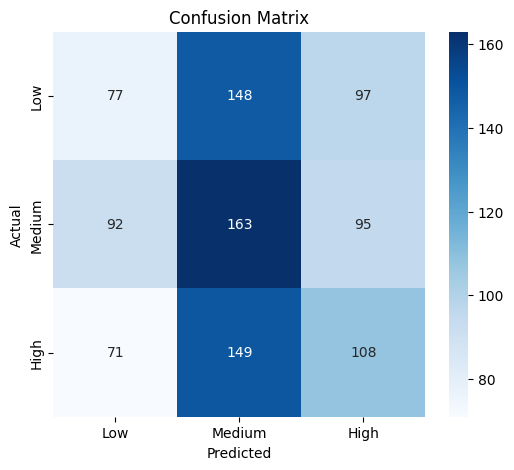

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [43]:
def compute_error(cm):
    total_errors = cm.sum() - np.trace(cm)  # Misclassified samples
    total_samples = cm.sum()  # All predictions
    return total_errors / total_samples  # Error Rate

# Example usage
error_rate = compute_error(cm)
print(f"Error Rate: {error_rate:.2%}")

Error Rate: 65.20%


## Searching for the best k

In [45]:

#import numpy as np
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import confusion_matrix

# Example: Features (X) and Labels (y) from training data
#X_train, X_test, y_train, y_test = ...  # Replace with actual split data

# Convert one-hot encoded labels to categorical (if needed)
from sklearn.metrics import confusion_matrix


# Function to compute error from confusion matrix
def compute_error(cm):
    return (cm.sum() - np.trace(cm)) / cm.sum()  # Error rate

# Test multiple values of k
k_values = range(1, 21)  # Example: k from 1 to 20
errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize KNN
    knn.fit(X_train, y_train)  # Fit model
    y_pred = knn.predict(X_test)  # Predict

    # Compute confusion matrix & error rate
    cm = confusion_matrix(y_test, y_pred)
    error = compute_error(cm)
    errors.append(error)

# Find the best k
best_k = k_values[np.argmin(errors)]
print(f"Best k: {best_k} with Error Rate: {min(errors):.2%}")

ValueError: multilabel-indicator is not supported

## To Do

* How can you evaluate the hypothesis that the problem with almost all predictions giving `Medium` is due to the disproportionate data in that column?
* Predict the numeric variable `Study_Hours_per_Week_normalized`, determine the error for each `k` and choice the best `k`.
* Add new variables that can improve performance.



### Ejercicios

¿Cómo se puede evaluar la hipótesis de que el problema con casi todas las predicciones que dan un resultado "Medio" se debe a la desproporción de los datos en esa columna?

Predecir la variable numérica "Horas_de_Estudio_por_Semana_normalizadas", determinar el error para cada "k" y elegir el mejor "k".

Añadir nuevas variables que puedan mejorar el rendimiento.

---
El siguiente código realiza un análisis y predicción de las horas de estudio semanales normalizadas usando un modelo de regresión K-Nearest Neighbors (KNN), enfocándose en encontrar el mejor valor de k y evaluar el impacto de nuevas variables creadas. Primero, muestra la distribución de la variable categórica Family_Income_Level para evaluar posibles desbalances. Luego, prepara los datos eliminando ciertas columnas, divide en entrenamiento y prueba, y escala las características. A continuación, prueba diferentes valores de k para entrenar el modelo KNN y calcula el error cuadrático medio (MSE) para cada uno, graficando esta relación y seleccionando el k que minimiza el error. Después, se crean tres nuevas variables que combinan niveles de estrés con acceso a internet y calificaciones, para intentar mejorar el modelo. Se entrena y evalúa nuevamente el modelo con estas nuevas características, calculando el MSE y comparándolo con el modelo original para medir la mejora porcentual en el error, mostrando así si las nuevas variables aportan valor predictivo.

**¿Cómo se puede evaluar la hipótesis de que el problema con casi todas las predicciones que dan un resultado "Medio" se debe a la desproporción de los datos en esa columna?**


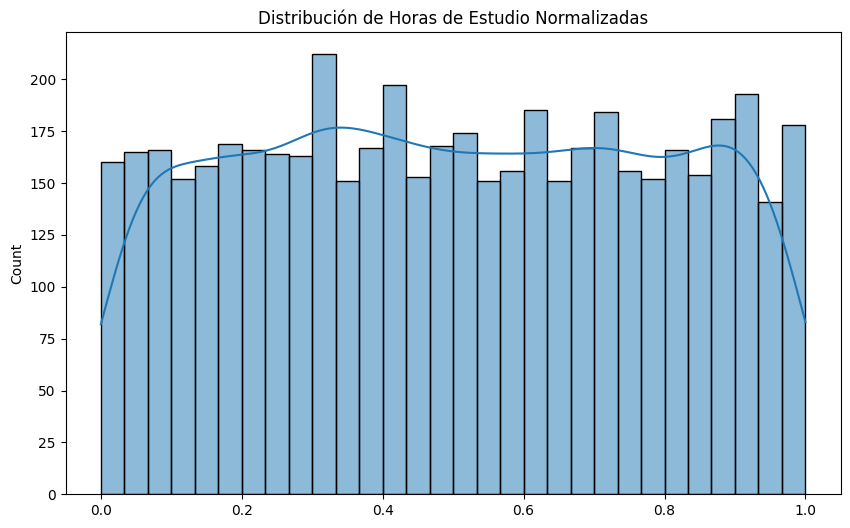

shape: (9, 2)
┌────────────┬───────────┐
│ statistic  ┆ value     │
│ ---        ┆ ---       │
│ str        ┆ f64       │
╞════════════╪═══════════╡
│ count      ┆ 5000.0    │
│ null_count ┆ 0.0       │
│ mean       ┆ 0.5008456 │
│ std        ┆ 0.287721  │
│ min        ┆ 0.0       │
│ 25%        ┆ 0.26      │
│ 50%        ┆ 0.496     │
│ 75%        ┆ 0.748     │
│ max        ┆ 1.0       │
└────────────┴───────────┘
Asimetría: 0.006256271772437342


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis de distribución de la variable objetivo
plt.figure(figsize=(10, 6))
sns.histplot(df5['Study_Hours_per_Week_normalized'], bins=30, kde=True)
plt.title('Distribución de Horas de Estudio Normalizadas')
plt.show()

# Estadísticos clave
print(df5['Study_Hours_per_Week_normalized'].describe())
print("Asimetría:", df5['Study_Hours_per_Week_normalized'].skew())


Distribución de Family_Income_Level:
shape: (3, 2)
┌─────────────────────┬───────┐
│ Family_Income_Level ┆ count │
│ ---                 ┆ ---   │
│ str                 ┆ u32   │
╞═════════════════════╪═══════╡
│ High                ┆ 1639  │
│ Medium              ┆ 1674  │
│ Low                 ┆ 1687  │
└─────────────────────┴───────┘


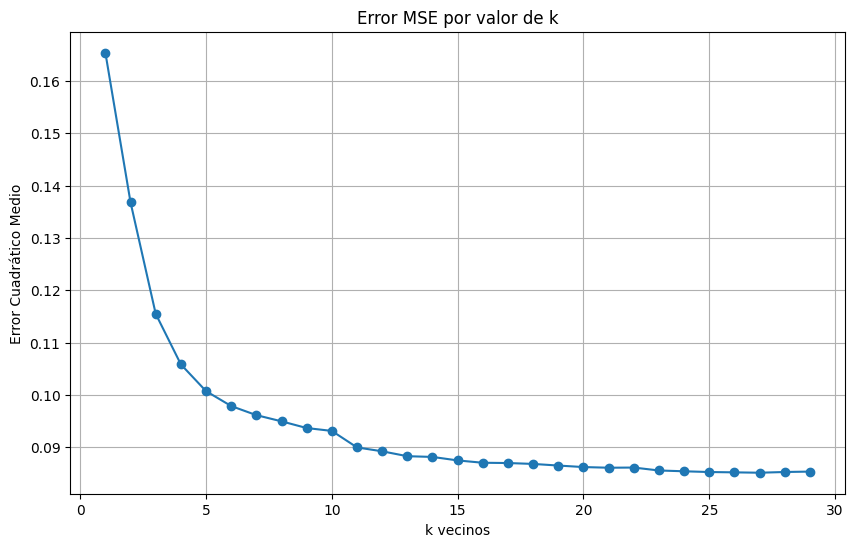


El mejor valor de k es: 27

Error cuadrático medio con nuevas características: 0.0851
Error cuadrático medio sin nuevas características: 0.0852
Mejora en el error: 0.12%


In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Evaluación del desbalanceo 
print("\nDistribución de Family_Income_Level:")

print(df2["Family_Income_Level"].value_counts())

# 2. Preparación de datos para predecir Study_Hours_per_Week_normalized

X = df5.drop(["Study_Hours_per_Week_normalized", "Income_Low", "Income_Medium", "Income_High"])
y = df5["Study_Hours_per_Week_normalized"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. mejor k 
k_values = range(1, 30)
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o')
plt.title('Error MSE por valor de k')
plt.xlabel('k vecinos')
plt.ylabel('Error Cuadrático Medio')
plt.grid(True)
plt.show()

# mejor k
best_k = k_values[np.argmin(mse_values)]
print(f"\nEl mejor valor de k es: {best_k}")

# 4. nuevas variables

df5 = df5.with_columns([

    (df5["Stress_Level (1-10)_normalized"] * df5["Internet_Access_at_Home"]).alias("stress_internet_interaction"),

    (df5["Stress_Level (1-10)_normalized"] * (df5["Grade_A"] + df5["Grade_B"] - df5["Grade_D"] - df5["Grade_F"])).alias("stress_grade_interaction"),

    (df5["Stress_Level (1-10)_normalized"] > df5["Stress_Level (1-10)_normalized"].median()).cast(pl.Int8).alias("high_stress")
])

# 5. Evaluar modelo
X_new = df5.drop(["Study_Hours_per_Week_normalized", "Income_Low", "Income_Medium", "Income_High"])
y_new = df5["Study_Hours_per_Week_normalized"]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Escalado de nuevas características
scaler_new = StandardScaler()
X_train_new_scaled = scaler_new.fit_transform(X_train_new)
X_test_new_scaled = scaler_new.transform(X_test_new)

# Entrenar modelo con mejor k y nuevas características
knn_new = KNeighborsRegressor(n_neighbors=best_k)
knn_new.fit(X_train_new_scaled, y_train_new)
y_pred_new = knn_new.predict(X_test_new_scaled)
mse_new = mean_squared_error(y_test_new, y_pred_new)

print(f"\nError cuadrático medio con nuevas características: {mse_new:.4f}")

# Comparación con modelo original
knn_original = KNeighborsRegressor(n_neighbors=best_k)
knn_original.fit(X_train_scaled, y_train)
y_pred_original = knn_original.predict(X_test_scaled)
mse_original = mean_squared_error(y_test, y_pred_original)

print(f"Error cuadrático medio sin nuevas características: {mse_original:.4f}")

# Porcentaje de mejora
improvement = ((mse_original - mse_new) / mse_original) * 100
print(f"Mejora en el error: {improvement:.2f}%")

In [6]:
import polars as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# 1. Cargar el dataset y preparar datos base
df = pl.read_csv('datos/Students_Grading_Dataset.csv')

# Seleccionar columnas relevantes
df2 = df.select(['Grade', 'Stress_Level (1-10)', 'Internet_Access_at_Home', 
               'Study_Hours_per_Week', 'Family_Income_Level'])

for col in ['Stress_Level (1-10)', 'Study_Hours_per_Week']:
    min_val = df2[col].min()
    max_val = df2[col].max()
    df2 = df2.with_columns(
        ((df2[col] - min_val) / (max_val - min_val)).alias(f"{col}_normalized")
    )

# Codificación one-hot
income_levels = ["Low", "Medium", "High"]
for i, level in enumerate(income_levels):
    df2 = df2.with_columns(
        (df2["Family_Income_Level"].is_in(income_levels[i:])).cast(pl.Int8).alias(f"Income_{level}")
    )

df4 = df2.with_columns(
    pl.col("Grade").eq("A").cast(pl.Int8).alias("Grade_A"),
    pl.col("Grade").eq("B").cast(pl.Int8).alias("Grade_B"),
    pl.col("Grade").eq("C").cast(pl.Int8).alias("Grade_C"),
    pl.col("Grade").eq("D").cast(pl.Int8).alias("Grade_D"),
    pl.col("Grade").eq("F").cast(pl.Int8).alias("Grade_F")
)

df4 = df4.with_columns(
    df4["Internet_Access_at_Home"].replace({"Yes": 1, "No": 0}).cast(pl.Int8)
)

columns_to_drop = [col for col in ["Grade", 'Stress_Level (1-10)', 'Study_Hours_per_Week', 'Family_Income_Level'] 
                  if col in df4.columns]
df5 = df4.drop(columns_to_drop)

# 2. Creación nuevas variables
df_enhanced = df5.with_columns([
    # estrés y buenas calificaciones
    (pl.col("Stress_Level (1-10)_normalized") * (pl.col("Grade_A") + pl.col("Grade_B"))).alias("stress_high_grades_interaction"),
    
    # estrés y malas calificaciones
    (pl.col("Stress_Level (1-10)_normalized") * (pl.col("Grade_D") + pl.col("Grade_F"))).alias("stress_low_grades_interaction"),
    
    # acceso a internet y nivel de estrés
    (pl.col("Internet_Access_at_Home") * pl.col("Stress_Level (1-10)_normalized")).alias("internet_stress_combo"),
    
    # Variable binaria para alto estrés 
    (pl.col("Stress_Level (1-10)_normalized") > pl.col("Stress_Level (1-10)_normalized").quantile(0.75)).cast(pl.Int8).alias("very_high_stress"),
    
    # Variable binaria para bajo estrés 
    (pl.col("Stress_Level (1-10)_normalized") < pl.col("Stress_Level (1-10)_normalized").quantile(0.25)).cast(pl.Int8).alias("very_low_stress"),
    
    # rendimiento compuesto
    ((pl.col("Grade_A") + pl.col("Grade_B")) - (pl.col("Grade_D") + pl.col("Grade_F"))).alias("performance_score"),

    (pl.col("Stress_Level (1-10)_normalized") ** 2).alias("stress_squared"),
    
    # Categoría de estudiante
    pl.when((pl.col("Grade_A") + pl.col("Grade_B")) > 0.5)
        .then(pl.when(pl.col("Stress_Level (1-10)_normalized") > 0.5)
                      .then(2)  
                      .otherwise(1))  
        .otherwise(pl.when(pl.col("Stress_Level (1-10)_normalized") > 0.5)
                      .then(3)  
                      .otherwise(0))  
    .alias("student_category")
])



Comparación de modelos:
MSE modelo original: 0.10074
MSE modelo con nuevas características: 0.09927
Reducción del error: 1.46%

Importancia de características según Random Forest:
                           Feature  Importance
9            internet_stress_combo    0.174085
13                  stress_squared    0.138528
1   Stress_Level (1-10)_normalized    0.131125
7   stress_high_grades_interaction    0.090650
8    stress_low_grades_interaction    0.084391
0          Internet_Access_at_Home    0.076663
2                          Grade_A    0.055003
6                          Grade_F    0.049642
5                          Grade_D    0.049551
4                          Grade_C    0.036573
3                          Grade_B    0.033595
14                student_category    0.033022
12               performance_score    0.024075
10                very_high_stress    0.012515
11                 very_low_stress    0.010583


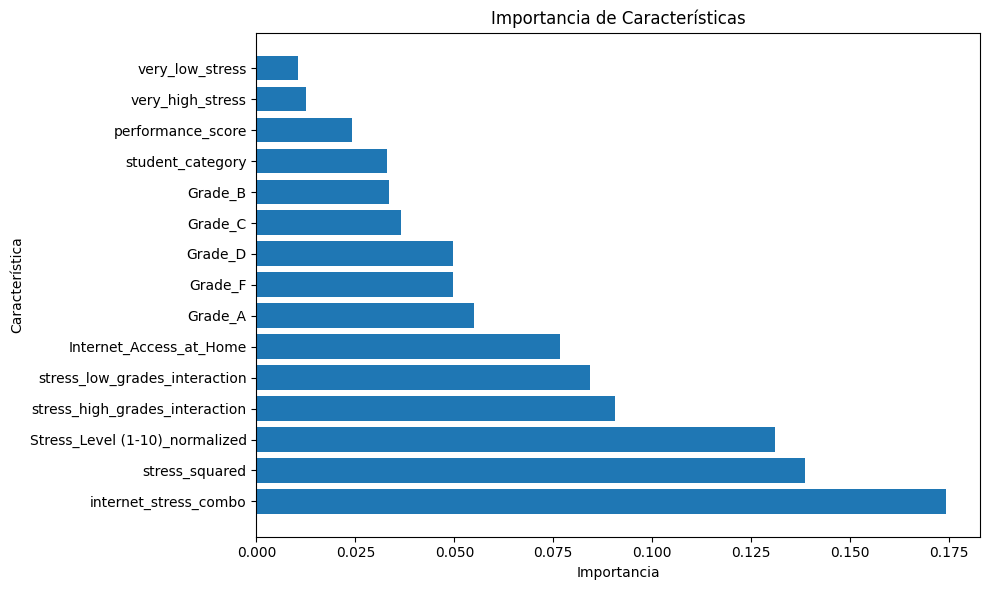

In [7]:
# 3. Evaluación de las nuevas variables
X_original = df5.drop(["Study_Hours_per_Week_normalized", "Income_Low", "Income_Medium", "Income_High"])
X_enhanced = df_enhanced.drop(["Study_Hours_per_Week_normalized", "Income_Low", "Income_Medium", "Income_High"])
y = df5["Study_Hours_per_Week_normalized"]

# División train-test
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X_original.to_pandas(), y.to_pandas(), test_size=0.2, random_state=42)

X_train_enh, X_test_enh, _, _ = train_test_split(
    X_enhanced.to_pandas(), y.to_pandas(), test_size=0.2, random_state=42)

scaler_orig = StandardScaler()
X_train_orig_scaled = scaler_orig.fit_transform(X_train_orig)
X_test_orig_scaled = scaler_orig.transform(X_test_orig)

scaler_enh = StandardScaler()
X_train_enh_scaled = scaler_enh.fit_transform(X_train_enh)
X_test_enh_scaled = scaler_enh.transform(X_test_enh)

# Entrenamiento y evaluación con k=5 
best_k = 5

# Modelo original
knn_orig = KNeighborsRegressor(n_neighbors=best_k)
knn_orig.fit(X_train_orig_scaled, y_train)
y_pred_orig = knn_orig.predict(X_test_orig_scaled)
mse_orig = mean_squared_error(y_test, y_pred_orig)

# Modelo mejorado
knn_enh = KNeighborsRegressor(n_neighbors=best_k)
knn_enh.fit(X_train_enh_scaled, y_train)
y_pred_enh = knn_enh.predict(X_test_enh_scaled)
mse_enh = mean_squared_error(y_test, y_pred_enh)

print("\nComparación de modelos:")
print(f"MSE modelo original: {mse_orig:.5f}")
print(f"MSE modelo con nuevas características: {mse_enh:.5f}")
print(f"Reducción del error: {((mse_orig - mse_enh)/mse_orig*100):.2f}%")

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_enh_scaled, y_train)

feature_importance = pd.DataFrame({
    'Feature': X_enhanced.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nImportancia de características segun Random Forest:")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Importancia de Caracteristicas')
plt.xlabel('Importancia')
plt.ylabel('Caracteristica')
plt.tight_layout()
plt.show()

#### Optimización de Hiperparámetros para KNN con Validación Cruzada

Este código realiza una comparación y optimización del parámetro **k** en un modelo de regresión basado en **K-Nearest Neighbors (KNN)**, evaluando dos conjuntos de datos: uno original y otro mejorado o enriquecido. Primero, para cada valor de k entre 1 y 30, usa validación cruzada de 5 pliegues para calcular el **Error Cuadrático Medio (MSE)** promedio en ambos conjuntos (original y mejorado), almacenando estos resultados para luego identificar el valor de k que minimiza el error en cada caso. Después, grafica las curvas de error en función de k para ambos modelos, destacando los k óptimos con líneas verticales. Finalmente, entrena dos modelos KNN con los mejores k encontrados para cada conjunto, predice sobre sus respectivos datos de prueba, calcula el MSE real y muestra la reducción porcentual de error al usar el modelo mejorado. 


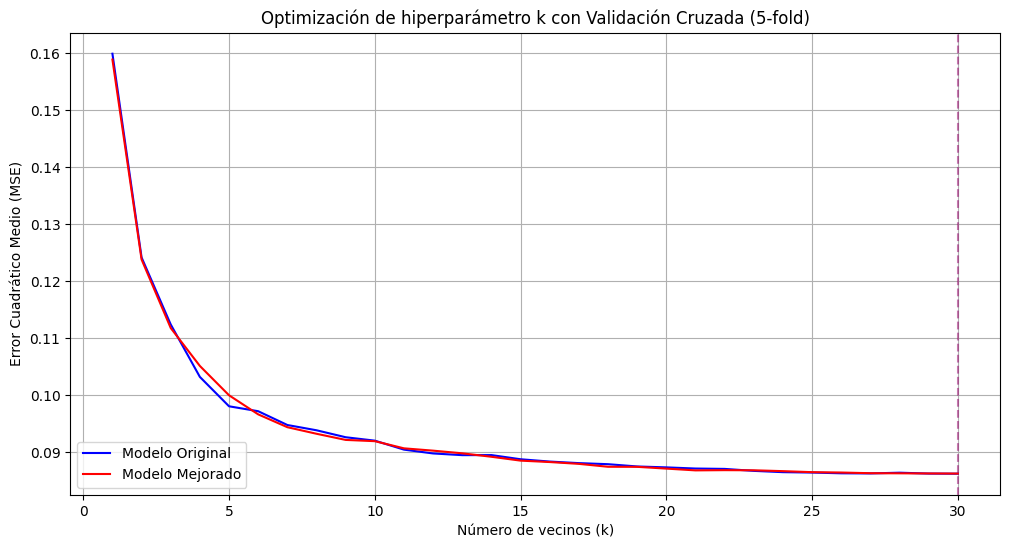


Mejor k para modelo original: 30 (MSE: 0.08618)
Mejor k para modelo mejorado: 30 (MSE: 0.08621)

Resultados con k optimizado:
MSE modelo original: 0.08490
MSE modelo mejorado: 0.08486
Reducción del error: 0.05%


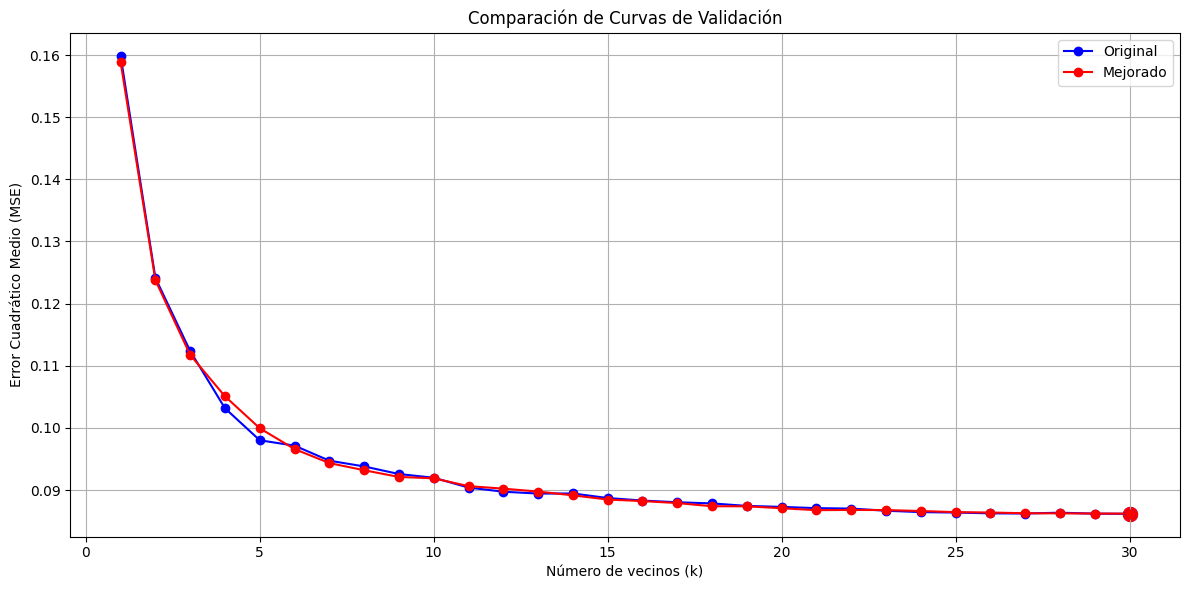

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, make_scorer

k_range = np.arange(1, 31) 

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

cv_scores_orig = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_orig_scaled, y_train, 
                           cv=5, scoring=mse_scorer)
    cv_scores_orig.append(-scores.mean()) 

cv_scores_enh = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_enh_scaled, y_train, 
                           cv=5, scoring=mse_scorer)
    cv_scores_enh.append(-scores.mean())

best_k_orig = k_range[np.argmin(cv_scores_orig)]
best_k_enh = k_range[np.argmin(cv_scores_enh)]

plt.figure(figsize=(12, 6))
plt.plot(k_range, cv_scores_orig, 'b-', label='Modelo Original')
plt.plot(k_range, cv_scores_enh, 'r-', label='Modelo Mejorado')
plt.axvline(x=best_k_orig, color='b', linestyle='--', alpha=0.3)
plt.axvline(x=best_k_enh, color='r', linestyle='--', alpha=0.3)
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Optimización hiperparámetro k con Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nMejor k modelo original: {best_k_orig} (MSE: {min(cv_scores_orig):.5f})")
print(f"Mejor k modelo mejorado: {best_k_enh} (MSE: {min(cv_scores_enh):.5f})")

knn_orig_optim = KNeighborsRegressor(n_neighbors=best_k_orig)
knn_orig_optim.fit(X_train_orig_scaled, y_train)
y_pred_orig = knn_orig_optim.predict(X_test_orig_scaled)
mse_orig = mean_squared_error(y_test, y_pred_orig)

knn_enh_optim = KNeighborsRegressor(n_neighbors=best_k_enh)
knn_enh_optim.fit(X_train_enh_scaled, y_train)
y_pred_enh = knn_enh_optim.predict(X_test_enh_scaled)
mse_enh = mean_squared_error(y_test, y_pred_enh)

print("\nResultados k optimizado:")
print(f"MSE modelo original: {mse_orig:.5f}")
print(f"MSE modelo mejorado: {mse_enh:.5f}")
print(f"Reducción error: {((mse_orig - mse_enh)/mse_orig*100):.2f}%")


plt.figure(figsize=(12, 6))
plt.plot(k_range, cv_scores_orig, 'b-o', label='Original')
plt.plot(k_range, cv_scores_enh, 'r-o', label='Mejorado')
plt.scatter([best_k_orig], [min(cv_scores_orig)], c='blue', s=100)
plt.scatter([best_k_enh], [min(cv_scores_enh)], c='red', s=100)
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Comparación de Curvas de Validación')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()